# Gradient Descent 1D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Gradient Descent in 1D

In [ ]:
# Defining the function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# Derivative function
def deriv(x):
  return 6*x - 3

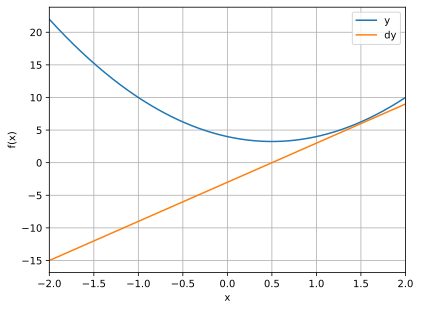

In [ ]:
# Plotting the function and its derivatives

# Defining the domain:
x = np.linspace(-2, 2, 2001)

# Plotting
plt.plot(x, fx(x), x, deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.legend(['f(x)', 'f\'(x)'])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

### Learning Algorithm

In [ ]:
# Starting Point
localmin = np.random.choice(x,1)    # From vector x, randomly choose 1 value
print('First Estimate: ', localmin)

# learning parameters
learning_rate = .01
training_epochs = 100

# Run through training:
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

First Estimate:  [0.55]


array([0.50010274])

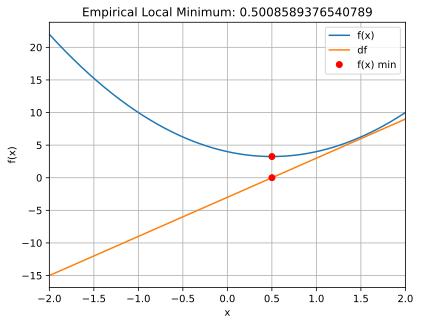

In [ ]:
# Plotting the results

plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, fx(localmin), 'ro')
plt.plot(localmin, deriv(localmin), 'ro')
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical Local Minimum: %s'%localmin[0])
plt.show()

In [ ]:
# Starting Point
localmin = np.random.choice(x,1)    # From vector x, randomly choose 1 value
print('First Estimate: ', localmin)

# learning parameters
learning_rate = .01        # Small learning steps
training_epochs = 150     # Number of iterations

# Run through training and store all results:
modelparams = np.zeros((training_epochs,2))
for j in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[j,0] = localmin[0]
  modelparams[j,1] = grad[0]

First Estimate:  [1.048]


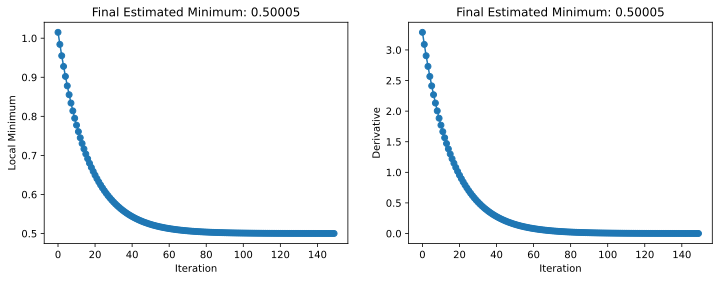

In [ ]:
# Plot the gradient over iterations

fig, ax = plt.subplots(1,2, figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i], 'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final Estimated Minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('Derivative')

plt.show()

# The smaller the training rate the higher the number of epochs needed to reach
# the local minima

### Using an Intended Gradient Value

In [ ]:
# We'll try and run a similar code for undefined number of epochs, but for a
# defined value of derivative

# Starting Point
localmin = np.random.choice(x,1)    # From vector x, randomly choose 1 value
print('First Estimate: ', localmin)

# learning parameters
learning_rate = .01        # Small learning steps
grad = 10               # random initial deriv value

# Run through training and store all results:
# Initialize modelparams as a list to dynamically store results
modelparams_list = []
j = 0
while abs(grad) >= 0.0001:
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams_list.append([localmin[0],grad[0]]) # Append to the list
  j+=1

# Convert the list to a NumPy array after the loop for subsequent plotting
modelparams = np.array(modelparams_list)

localmin

First Estimate:  [0.692]


array([0.50001485])

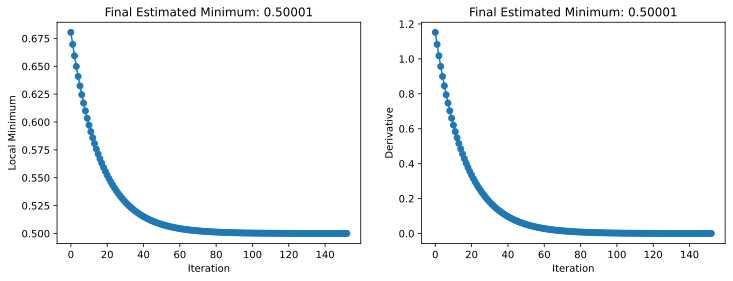

Number of iterations:  153


In [ ]:
# Plot the gradient over iterations

fig, ax = plt.subplots(1,2, figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i], 'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final Estimated Minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local Minimum')
ax[1].set_ylabel('Derivative')

plt.show()

print('Number of iterations: ', j)